<a href="https://colab.research.google.com/github/rtajeong/M3/blob/main/code5_text_proc_rev1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text data Processing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Bag of Words
- document-term matrix
- tfidf

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
corpus = [
    'This is the first document',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?'
]

In [ ]:
vect = CountVectorizer()
X = vect.fit_transform(corpus)

In [ ]:
X.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

In [ ]:

print(X.toarray())
print(vect.get_feature_names())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]
['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [ ]:
vect = TfidfVectorizer()
X = vect.fit_transform(corpus)
print(X.toarray().round(1))
print(vect.get_feature_names())

[[0.  0.5 0.6 0.4 0.  0.  0.4 0.  0.4]
 [0.  0.7 0.  0.3 0.  0.5 0.3 0.  0.3]
 [0.5 0.  0.  0.3 0.5 0.  0.3 0.5 0.3]
 [0.  0.5 0.6 0.4 0.  0.  0.4 0.  0.4]]
['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [ ]:
vect = TfidfVectorizer(ngram_range=[1,2], stop_words='english')
X = vect.fit_transform(corpus)
print(X.toarray().round(1))
print(vect.get_feature_names())

[[1.  0.  0.  0. ]
 [0.6 0.5 0.5 0.5]
 [0.  0.  0.  0. ]
 [1.  0.  0.  0. ]]
['document', 'document second', 'second', 'second document']


### practical example

In [ ]:
!curl -L https://bit.ly/2WC9nvn -o spam.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   141  100   141    0     0    870      0 --:--:-- --:--:-- --:--:--   870
100   137    0   137    0     0    276      0 --:--:-- --:--:-- --:--:--  1304
100   318  100   318    0     0    392      0 --:--:-- --:--:-- --:--:--   392
100  488k  100  488k    0     0   199k      0  0:00:02  0:00:02 --:--:--  654k


In [ ]:
sms = pd.read_csv('spam.csv', encoding='latin-1')
sms.head(3)

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [ ]:
sms.shape

(5574, 2)

In [ ]:
sms.columns = ['category', 'text']
sms.head(3)

,category,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [ ]:
sms['category'].value_counts()

ham     4827
spam     747
Name: category, dtype: int64

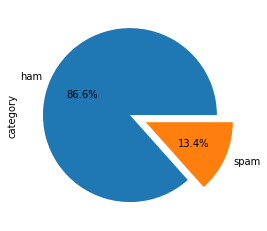

In [ ]:
sms['category'].value_counts().plot(kind='pie', explode=[0, 0.2], autopct='%1.1f%%')

In [ ]:
sms.head()

,category,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
sms_corpus = sms['text']
vect = CountVectorizer(min_df=10, stop_words='english')
X = vect.fit_transform(sms_corpus)
X.shape

(5574, 837)

In [ ]:
# 5 most frequently appeared words
iidx = X.toarray().sum(0).argsort()[-5:][::-1]
iidx
[vect.get_feature_names()[i] for i in iidx]

['ur', 'just', 'gt', 'lt', 'ok']

In [ ]:
vect = TfidfVectorizer(min_df=10, stop_words='english')
X = vect.fit_transform(sms_corpus)
iidx = X.toarray().sum(0).argsort()[-5:][::-1]
print([vect.get_feature_names()[i] for i in iidx])
print([X.toarray().sum(0)[i] for i in iidx])

['ok', 'just', 'll', 'ur', 'come']
[122.06978727192575, 106.16332625717925, 96.57382567023429, 91.57779277147964, 87.15189392798636]


### word cloud

In [ ]:
spam_sms = sms[sms["category"] == "spam"]["text"]
ham_sms = sms[sms["category"] == "ham"]["text"]

spam_words = []
ham_words = []

In [ ]:
spam_sms.values.shape

(747,)

In [ ]:
!pip install nltk

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
for i in range(spam_sms.values.shape[0]):
    msg = spam_sms.values[i]
    words = [word.lower() for word in word_tokenize(msg)
                              if word.lower() not in stopwords.words('english') and
                                 word.lower().isalpha()]
    spam_words = spam_words + words

In [ ]:
len(spam_words)

18822

In [ ]:
!pip install wordcloud

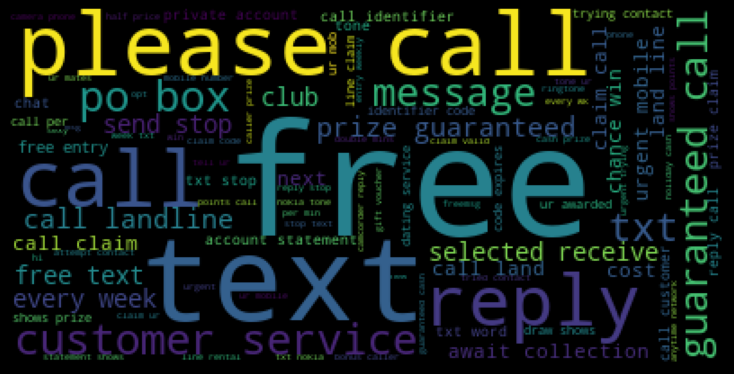

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=400, height=200)
spam_wordcloud = wc.generate(" ".join(spam_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

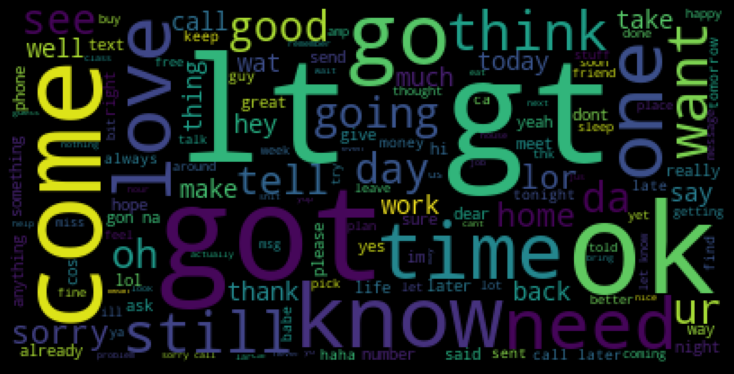

In [ ]:
for i in range(ham_sms.values.shape[0]):
    msg = ham_sms.values[i]
    words = [word.lower() for word in word_tokenize(msg) 
                               if word.lower() not in stopwords.words('english') and
                                  word.lower().isalpha()]
    ham_words = ham_words + words
    
wc = WordCloud(width=400, height=200)
ham_wordcloud = wc.generate(" ".join(ham_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Word Embedding
- word vector

In [ ]:
!pip install gensim

In [ ]:
from gensim.models.word2vec import Word2Vec

In [ ]:
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
             ['this', 'is', 'the', 'second', 'sentence'],
             ['yet', 'another', 'sentence'],
             ['one', 'more', 'sentence'],
             ['and', 'the', 'final', 'sentence']]

In [ ]:
model = Word2Vec(sentences, min_count=1, size=5)

In [ ]:
print(model)

Word2Vec(vocab=14, size=5, alpha=0.025)


In [ ]:
words = list(model.wv.vocab)   # summarize the vocabulary
words

['this',
 'is',
 'the',
 'first',
 'sentence',
 'for',
 'word2vec',
 'second',
 'yet',
 'another',
 'one',
 'more',
 'and',
 'final']

In [ ]:
model['sentence','this']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([[-0.0533178 ,  0.06991275, -0.04516679,  0.08732039,  0.08024914],
       [ 0.01769335, -0.09075602, -0.00361841, -0.03642931,  0.06306703]],
      dtype=float32)

In [ ]:
# dim 5 --> dim 2  (dimension reduction)
from sklearn.decomposition import PCA


In [ ]:
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [ ]:
result

array([[ 0.08228113,  0.08945554],
       [-0.10503554, -0.08241695],
       [ 0.02741074, -0.06525746],
       [ 0.03652983, -0.07220708],
       [ 0.09130134, -0.08690029],
       [-0.08741948,  0.00103827],
       [ 0.00047301, -0.01759291],
       [-0.09633465,  0.05797772],
       [ 0.10067707,  0.06930096],
       [-0.01323696,  0.02253059],
       [-0.07721842, -0.00268557],
       [-0.02354679,  0.15015998],
       [ 0.15180618, -0.02873696],
       [-0.08768746, -0.03466589]], dtype=float32)

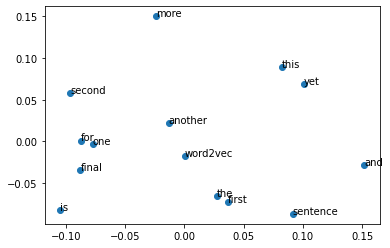

In [ ]:
plt.scatter(result[:,0], result[:,1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i,0], result[i,1]))
plt.show()

In [ ]:
model[words]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([[ 0.01769335, -0.09075602, -0.00361841, -0.03642931,  0.06306703],
       [-0.00346637,  0.09087368,  0.07193889,  0.04360697, -0.08866008],
       [-0.03222012, -0.0109118 , -0.0813173 , -0.0875005 , -0.09803427],
       [ 0.04831369,  0.02296108, -0.08814226,  0.06470124, -0.05012899],
       [-0.0533178 ,  0.06991275, -0.04516679,  0.08732039,  0.08024914],
       [ 0.06610022,  0.05847459,  0.06485042, -0.00657108, -0.03618503],
       [ 0.07618334,  0.08562198, -0.05194413, -0.07647113,  0.02469021],
       [ 0.09244613,  0.03788759,  0.08824971, -0.05549372, -0.0121612 ],
       [ 0.06057655, -0.05851373, -0.0446124 ,  0.00969381,  0.08541141],
       [ 0.08650764, -0.0354495 ,  0.01433328,  0.08631583, -0.0408585 ],
       [ 0.09321065,  0.04744858,  0.0293197 , -0.00218564, -0.05569273],
       [ 0.09959981, -0.09594067,  0.09639664, -0.00451068,  0.02677119],
       [-0.04156236, -0.05740102, -0.09471075,  0.06207674,  0.04681986],
       [ 0.01340352,  0.03496922,  0.0

In [ ]:
model.most_similar('word2vec')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('one', 0.46263188123703003),
 ('second', 0.4458765983581543),
 ('for', 0.3642628788948059),
 ('the', 0.21612930297851562),
 ('first', 0.20553696155548096),
 ('yet', 0.17167928814888),
 ('sentence', -0.018474120646715164),
 ('is', -0.07666971534490585),
 ('this', -0.10760621726512909),
 ('more', -0.1815480887889862)]

In [ ]:
model.similarity('sentence', 'word2vec')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


-0.018474154

# Pre-trained Word2Vec
- GoogleNews-vectors-negative300.bin
- example

In [ ]:
import gensim
from gensim.models import word2vec
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
!wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2021-09-30 06:58:39--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.95.72
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.95.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘/root/input/GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  34.6MB/s    in 46s     

2021-09-30 06:59:25 (33.9 MB/s) - ‘/root/input/GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [ ]:
!ls -l /root/input

total 1608448
-rw-r--r-- 1 root root 1647046227 Mar  5  2015 GoogleNews-vectors-negative300.bin.gz


In [ ]:
EMBEDDING_FILE = '/root/input/GoogleNews-vectors-negative300.bin.gz'
word_vectors = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

In [ ]:
v_apple = word_vectors["apple"] 
v_mango = word_vectors["mango"]
print(v_apple.shape)
print(v_mango.shape)
cosine_similarity([v_mango],[v_apple])

(300,)
(300,)


array([[0.57518554]], dtype=float32)

In [ ]:
import numpy as np
def odd_one_out(words):
    
    all_word_vectors = [word_vectors[w] for w in words]
    avg_vector = np.mean(all_word_vectors,axis=0)
    #print(avg_vector.shape)
    
    odd_one_out = None
    min_similarity = 1.0 
    
    for w in words:
        sim = cosine_similarity([word_vectors[w]],[avg_vector])
        if sim < min_similarity:
            min_similarity = sim
            odd_one_out = w
    
        print("Similairy btw %s and avg vector is %.2f"%(w,sim))
            
    return odd_one_out

In [ ]:
pred=[]
import pandas as pd
import numpy as np
dfx = pd.read_csv('https://raw.githubusercontent.com/shankygupta79/GoogleCollabFiles/master/OddOne.csv').values
for i in range(4,8):
    a=dfx[i]
    a=a.reshape(-1)
    pred.append(odd_one_out(a))
    
    
print(pred)

Similairy btw India and avg vector is 0.41
Similairy btw football and avg vector is 0.70
Similairy btw hockey and avg vector is 0.76
Similairy btw cricket and avg vector is 0.80
Similairy btw swimming and avg vector is 0.57
Similairy btw who and avg vector is 0.54
Similairy btw why and avg vector is 0.81
Similairy btw what and avg vector is 0.79
Similairy btw where and avg vector is 0.67
Similairy btw is and avg vector is 0.47
Similairy btw on and avg vector is 0.66
Similairy btw in and avg vector is 0.72
Similairy btw over and avg vector is 0.64
Similairy btw their and avg vector is 0.60
Similairy btw was and avg vector is 0.54
Similairy btw India and avg vector is 0.79
Similairy btw Australia and avg vector is 0.71
Similairy btw Japan and avg vector is 0.79
Similairy btw Russia and avg vector is 0.74
Similairy btw China and avg vector is 0.82
['India', 'is', 'was', 'Australia']


In [ ]:
dfx

array([['elephant', 'lion', 'tiger', 'goat', 'snake'],
       ['man', 'policeman', 'fireman', 'teacher', 'postman'],
       ['plane', 'bird', 'rocket', 'balloon', 'cat'],
       ['onion', 'celery', 'lettuce', 'pineapple', 'potato'],
       ['India', 'football', 'hockey', 'cricket', 'swimming'],
       ['who', 'why', 'what', 'where', 'is'],
       ['on', 'in', 'over', 'their', 'was'],
       ['India', 'Australia', 'Japan', 'Russia', 'China'],
       ['Dollar', 'Rupees', 'Euros', 'Cents', 'Money'],
       ['eat', 'sleep', 'drink', 'think', 'dance'],
       ['car', 'scooter', 'bike', 'bicycle', 'ship'],
       ['Poland', 'Russia', 'England', 'Rome', 'Ukraine'],
       ['Lake', 'Sea', 'River', 'Pool', 'Pond'],
       ['Sun', 'Moon', 'Star', 'Mars', 'Egypt'],
       ['fox', 'wolf', 'jackal', 'mouse', 'panther'],
       ['veil', 'turban', 'helmet', 'shirt', 'hat'],
       ['Physics', 'Chemistry', 'Geography', 'Botany', 'Universe'],
       ['Assassinate', 'Kill', 'Kidnap', 'Stab', 'Murder'],
